# Exercise 13-1: Another analysis of the Fires data - Solution

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as geo

## Get the data

In [2]:
fires = pd.read_pickle('../../data/fires_clean.pkl')

In [3]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274123 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128667 non-null  object        
 1   acres_burned    274123 non-null  float64       
 2   state           274123 non-null  object        
 3   latitude        274123 non-null  float64       
 4   longitude       274123 non-null  float64       
 5   fire_year       274123 non-null  int64         
 6   discovery_date  274123 non-null  datetime64[ns]
 7   contain_date    137376 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.8+ MB


## Clean and prepare the data

In [4]:
fires = fires.query('state == "AK"')

In [5]:
fires['days_burning'] = (fires.contain_date - fires.discovery_date).dt.days

In [6]:
fires = fires.query('days_burning >= 90 and acres_burned >= 100')

In [7]:
fires.days_burning.describe(percentiles=[.25,.50,.75,.90,.95])

count     235.000000
mean      111.531915
std        66.788815
min        90.000000
25%        97.000000
50%       103.000000
75%       113.500000
90%       127.000000
95%       142.300000
max      1101.000000
Name: days_burning, dtype: float64

In [8]:
fires = fires.query('days_burning <= 200')

In [9]:
fires.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,days_burning
210516,332248,36250.0,AK,65.7995,-149.7192,1993,1993-06-04,1993-09-03,91.0
210546,3322292,47494.0,AK,66.1164,-142.8692,1993,1993-06-06,1993-09-08,94.0
210831,404275,43329.7,AK,62.7827,-155.4190,1994,1994-06-13,1994-09-22,101.0
210855,412312,22420.0,AK,63.8329,-145.2856,1994,1994-06-14,1994-10-04,112.0
211030,Gal Ne 76,2780.0,AK,65.8328,-155.3693,1995,1995-07-16,1995-10-16,92.0


##  Plot the data

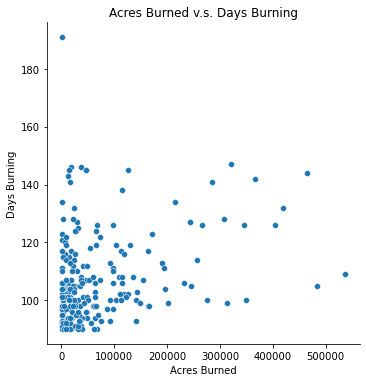

In [10]:
g = sns.relplot(data=fires, x='acres_burned', y='days_burning')

for ax in g.axes.flat:
    ax.set(title='Acres Burned v.s. Days Burning', 
           ylabel='Days Burning', xlabel='Acres Burned')

In [11]:
usa = geo.read_file('../../data/Maps/states.shp')

In [12]:
ak_map = usa[usa.STATE_ABBR == 'AK']

<AxesSubplot:>

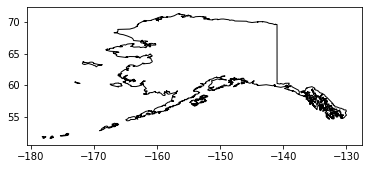

In [13]:
ak_map.plot(color='white', edgecolor='black')

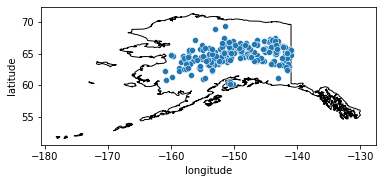

In [14]:
ak_map.plot(color='white', edgecolor='black')
ax = sns.scatterplot(data=fires, x='longitude', y='latitude')

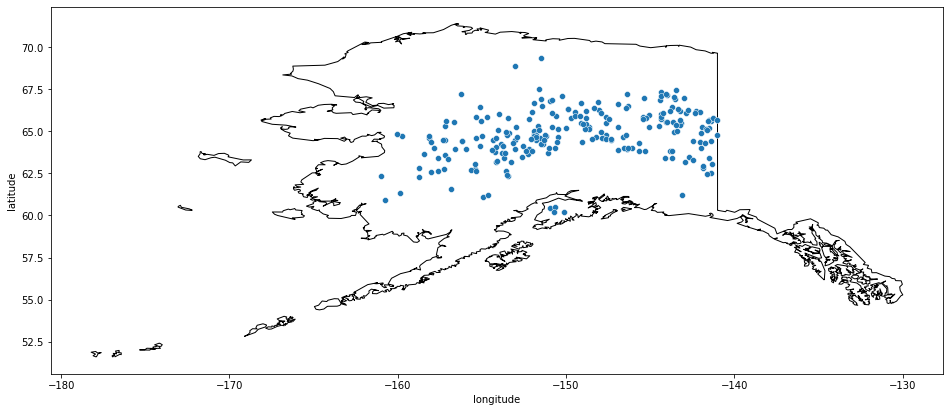

In [15]:
# increase the size on the plot from the previous cell
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude')

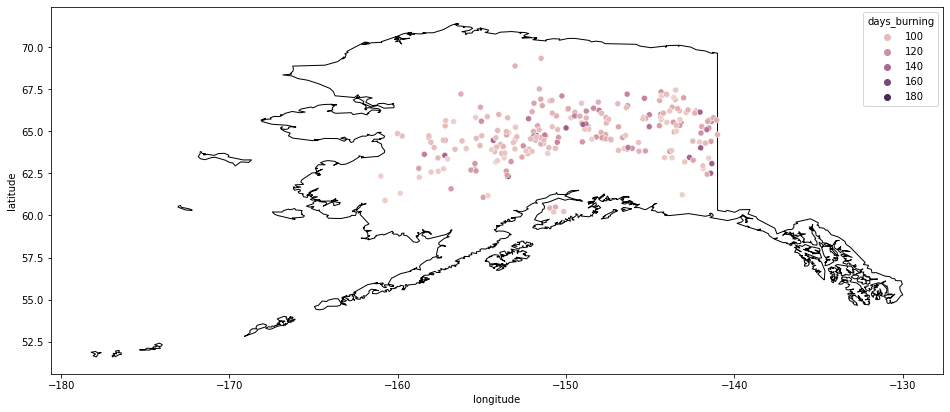

In [16]:
# modify the map so that the color of the dots changes with length of the fire
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude', hue='days_burning')

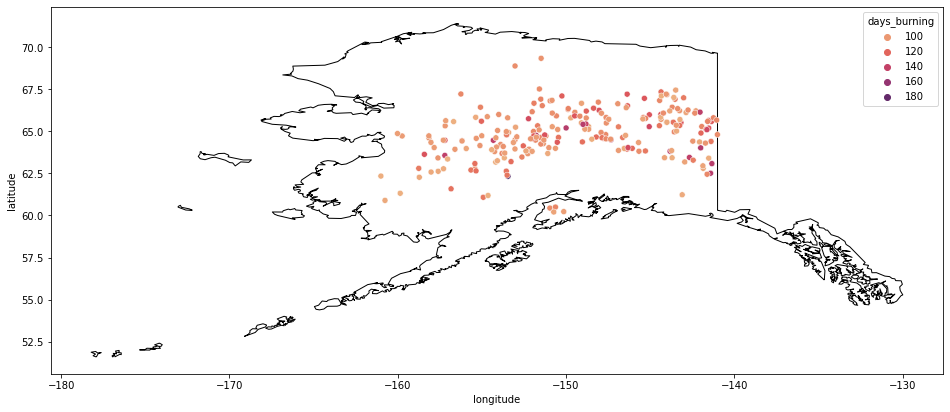

In [17]:
# modify the color of the dots to use a reversed gradient colormap 
# hint: remember that you can reverse a colormap by adding _r to the colormap name
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude', hue='days_burning', palette='flare')

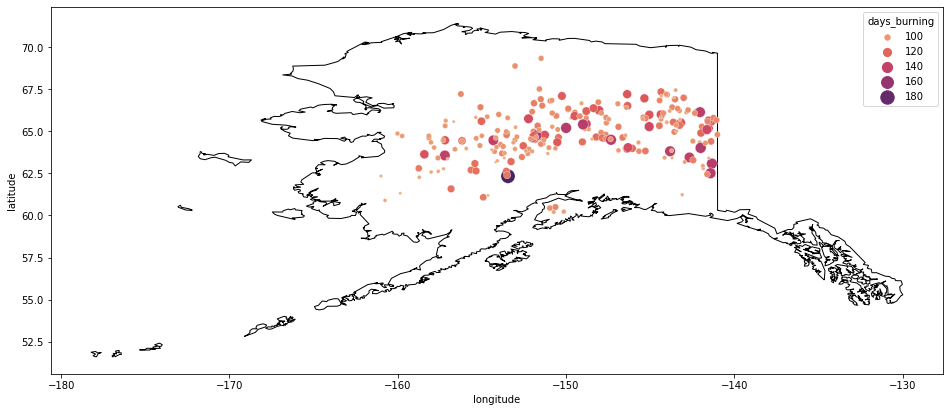

In [18]:
# modify the map so that the acres burned will control the size of the dots
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude', 
                     hue='days_burning', palette='flare', 
                     size='days_burning', sizes=(10,200))